In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('E:/BaiduNetdiskDownload/论文/ALF_Data.csv')
data.dropna(subset = ['Hepatitis'], inplace = True)

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
for i in ['Weight', 'Height', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol']:
    data.loc[:, i] = SimpleImputer(strategy = 'mean').fit_transform(data[i].values.reshape(-1, 1))
for i in ['Obesity', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision', 'HyperTension', 'Family Hepatitis', 'Chronic Fatigue', 'ALF']:
    data.loc[:, i] = SimpleImputer(strategy = 'most_frequent').fit_transform(data[i].values.reshape(-1, 1))
data.loc[:, 'Body Mass Index'] = data['Weight'] / ((data['Height'] / 100) ** 2)
data.loc[:, 'Total Cholesterol'] = data['Good Cholesterol'] + data['Bad Cholesterol']

In [3]:
data

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.311892,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.882043,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.772781,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.940732,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.842390,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,35,F,east,70.0,171.5,23.799607,0.0,87.5,114.0,76.0,...,0.0,1,0.0,1,0.0,1,0.0,0.0,0.0,0.0
8781,66,F,north,102.0,180.7,31.238046,1.0,113.2,117.0,72.0,...,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,0.0
8782,37,F,south,84.4,186.0,24.395884,0.0,93.6,144.0,82.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
8783,39,F,east,92.1,184.8,26.968432,0.0,98.2,121.0,75.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0


In [4]:
for i in ['Gender', 'Region', 'Source of Care']:
    data.loc[:, i] = OrdinalEncoder().fit_transform(data[i].values.reshape(-1, 1))

In [5]:
data.loc[:, 'Hepatitis'] = data['Hepatitis'].astype('int')

In [6]:
X = data.loc[:, data.columns != 'Hepatitis']
Y = data.loc[:, 'Hepatitis']

In [7]:
train = data.iloc[:6000]
test = data.iloc[6000:]
Xtrain = train.loc[:, train.columns != 'Hepatitis']
Ytrain = train.loc[:, 'Hepatitis']
Xtest = test.loc[:, test.columns != 'Hepatitis']
Ytest = test.loc[:, 'Hepatitis']

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
lr = LR(solver = 'liblinear', random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8600915304126934
0.190315690181294


In [9]:
lr = LR(random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8450394145279329
0.19700878144333578


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
import matplotlib.pyplot as plt

0.8608334509384892 6.5
0.1898317798168121 6.5


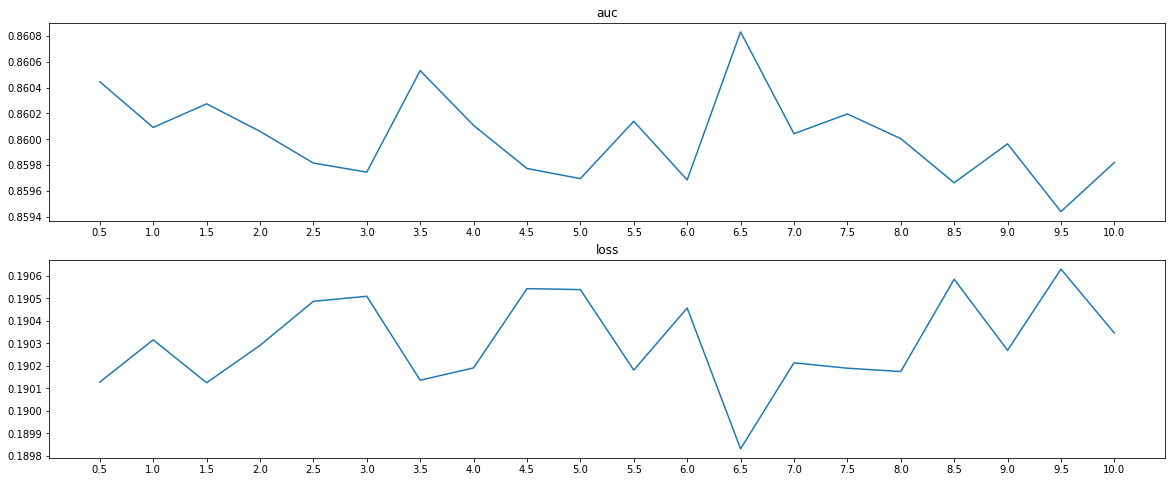

In [11]:
auc = []
loss = []
epoch = np.arange(0.5, 10.5, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8608334509384892 30
0.1898317798168121 30


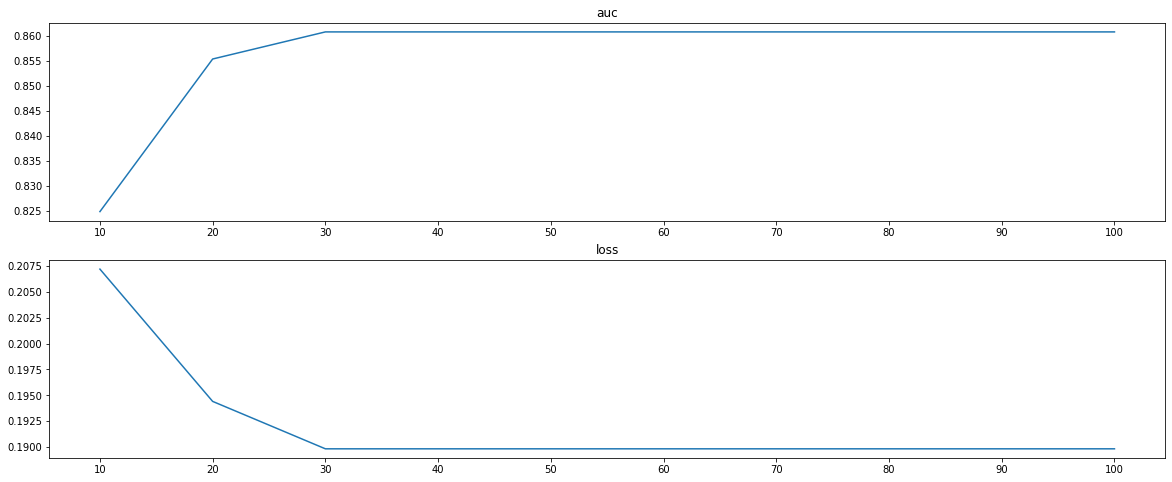

In [12]:
auc = []
loss = []
epoch = np.arange(10, 110, 10)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 6.5, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

0.8608334509384892 l2
0.1898317798168121 l2


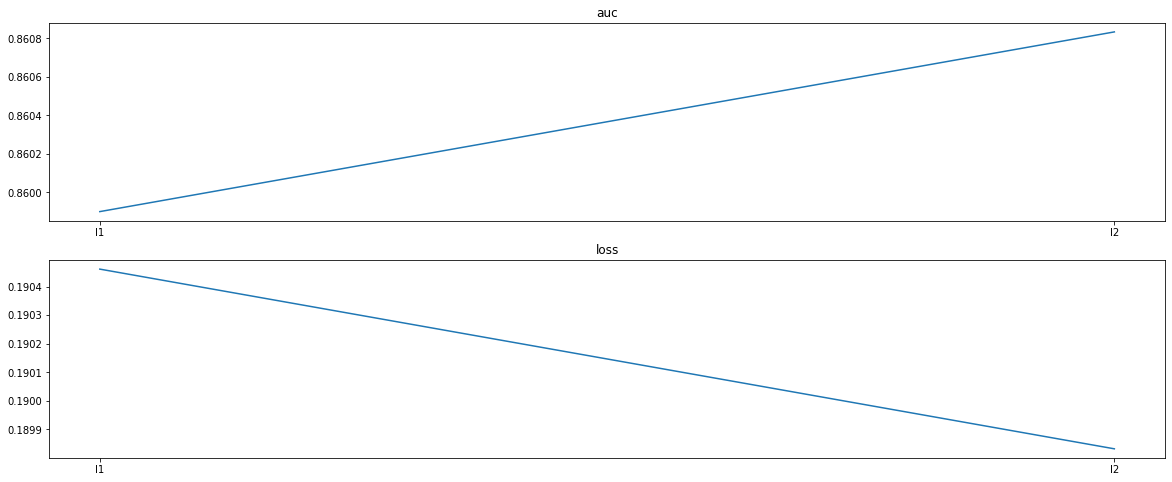

In [13]:
auc = []
loss = []
epoch = ['l1', 'l2']
for i in epoch:
    lr = LR(solver = 'liblinear',C = 6.5, max_iter = 30, penalty = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The m

0.8608334509384892 liblinear
0.1898317798168121 liblinear


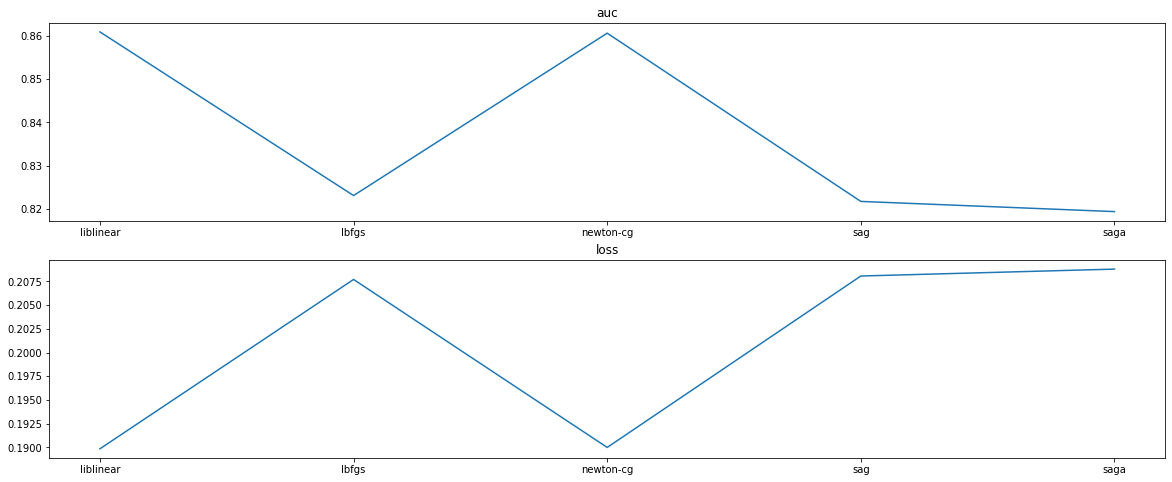

In [14]:
auc = []
loss = []
epoch = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
for i in epoch:
    lr = LR(solver = i, C = 6.5, max_iter = 30, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

In [15]:
data = pd.read_csv('E:/BaiduNetdiskDownload/论文/ALF_Data.csv')
data.dropna(subset = ['Hepatitis'], inplace = True)
data = data.replace(' ', -1).fillna(-1)
dic1 = {'Private Hospital':1, -1:2, 'Governament Hospital':3, 'Never Counsulted':4, 'clinic':5}
dic2 = {'F':1, 'M':2}
dic3 = {'north':1, 'east':2, 'south':3, 'west':4}
data.loc[:, 'Gender'] = data['Gender'].apply(lambda x: dic2[x])
data.loc[:, 'Region'] = data['Region'].apply(lambda x: dic3[x])
data.loc[:, 'Source of Care'] = data['Source of Care'].apply(lambda x: dic1[x])
# for i in ['Gender', 'Region', 'Source of Care']:
#     data.loc[:, i] = OrdinalEncoder().fit_transform(data[i].values.reshape(-1, 1))
data.loc[:, 'Hepatitis'] = data['Hepatitis'].astype('int')
train = data.iloc[:6000]
test = data.iloc[6000:]
Xtrain = train.loc[:, train.columns != 'Hepatitis']
Ytrain = train.loc[:, 'Hepatitis']
Xtest = test.loc[:, test.columns != 'Hepatitis']
Ytest = test.loc[:, 'Hepatitis']

In [16]:
lr = LR(solver = 'liblinear', random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.84607770004637
0.20231788030878445


In [17]:
lr = LR(random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8329489324811999
0.20597371044242269


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8466885748271205 5.5
0.20209462854291713 4.0


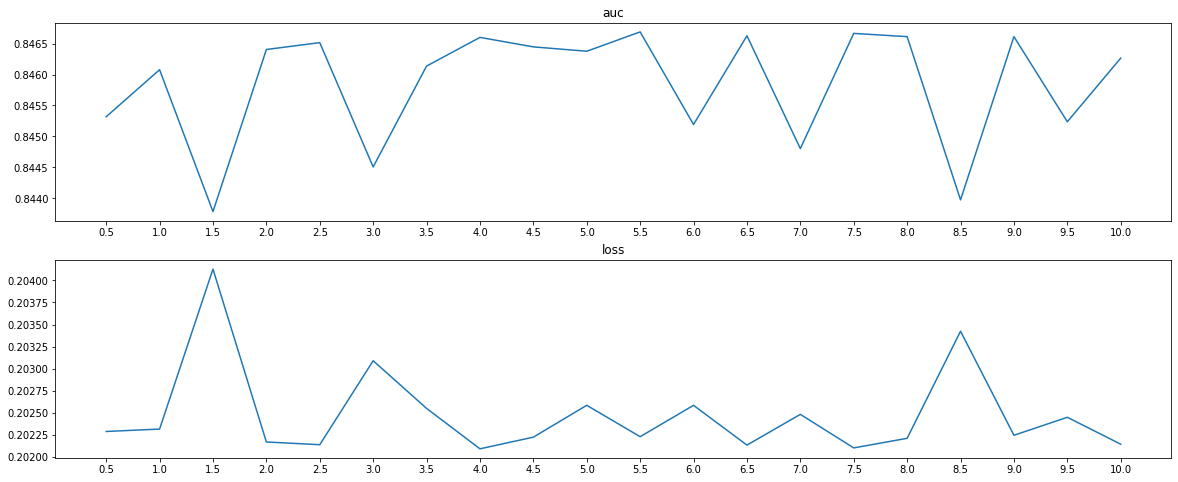

In [18]:
auc = []
loss = []
epoch = np.arange(0.5, 10.5, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8475333158605672 20
0.20211905692053786 20


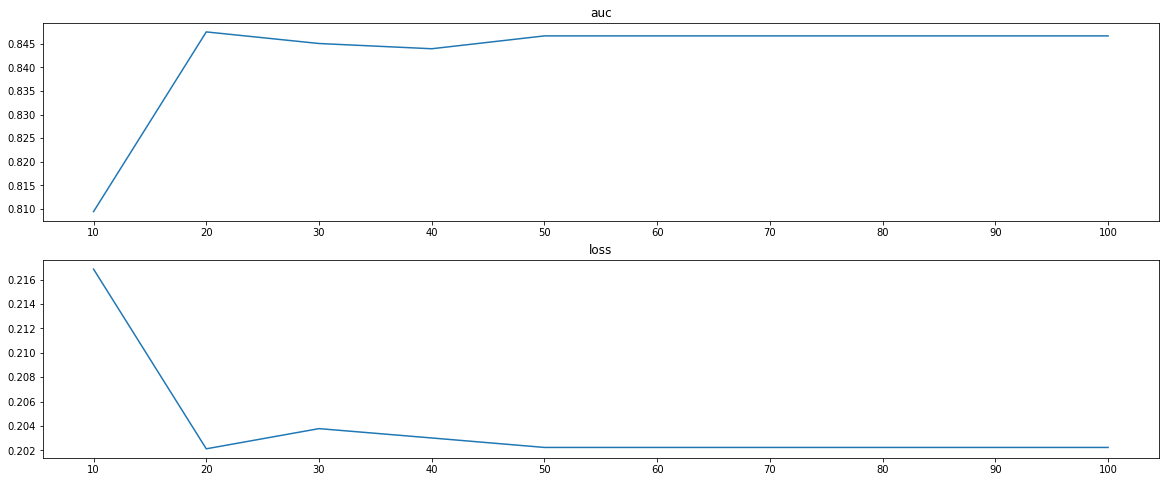

In [6]:
auc = []
loss = []
epoch = np.arange(10, 110, 10)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 5.5, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8475333158605672 l2
0.20173551688024896 l1


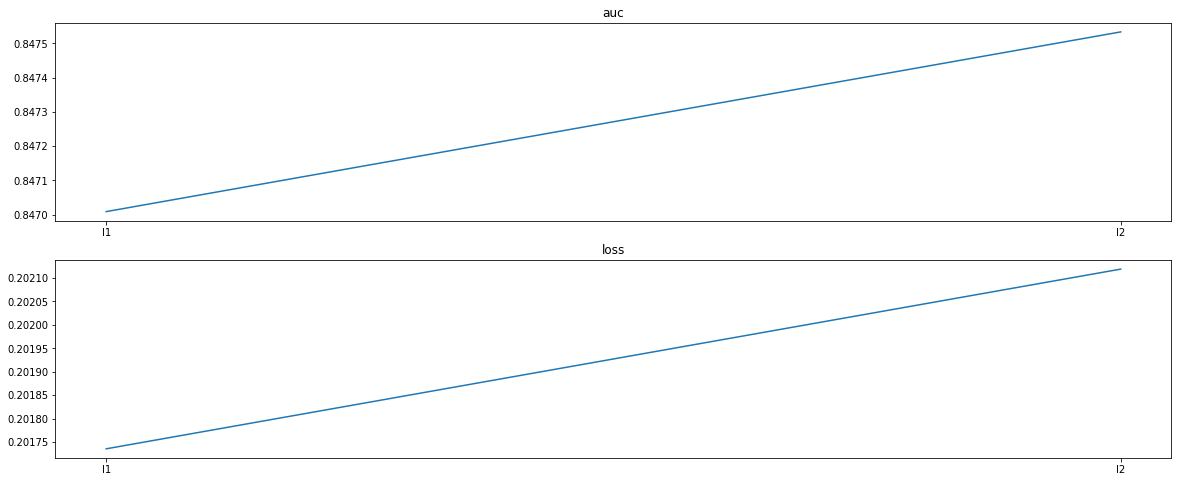

In [19]:
auc = []
loss = []
epoch = ['l1', 'l2']
for i in epoch:
    lr = LR(solver = 'liblinear',C = 5.5, max_iter = 20, penalty = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter 

0.8468700227817987 liblinear
0.20218303142441926 liblinear


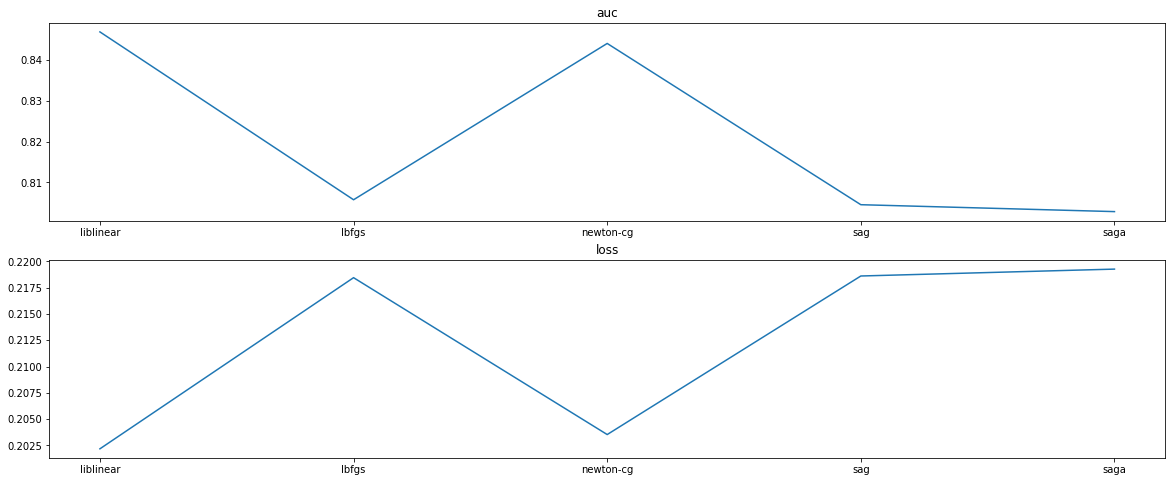

In [20]:
auc = []
loss = []
epoch = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
for i in epoch:
    lr = LR(solver = i, C = 6.5, max_iter = 30, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('E:/BaiduNetdiskDownload/论文/ALF_Data.csv')
data.dropna(subset = ['Hepatitis'], inplace = True)
data = data.replace(' ', -1).fillna(-1)
dic1 = {'Private Hospital':1, -1:2, 'Governament Hospital':3, 'Never Counsulted':4, 'clinic':5}
dic2 = {'F':1, 'M':2}
dic3 = {'north':1, 'east':2, 'south':3, 'west':4}
data.loc[:, 'Gender'] = data['Gender'].apply(lambda x: dic2[x])
data.loc[:, 'Region'] = data['Region'].apply(lambda x: dic3[x])
data.loc[:, 'Source of Care'] = data['Source of Care'].apply(lambda x: dic1[x])
# for i in ['Gender', 'Region', 'Source of Care']:
#     data.loc[:, i] = OrdinalEncoder().fit_transform(data[i].values.reshape(-1, 1))
dense_features=['Age','Weight','Height',
                'Body Mass Index','Waist','Maximum Blood Pressure',
                'Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol',
                'Total Cholesterol']
mms = MinMaxScaler(feature_range=(0, 1))
data.loc[:, dense_features] = mms.fit_transform(data[dense_features])
data.loc[:, 'Hepatitis'] = data['Hepatitis'].astype('int')
train = data.iloc[:6000]
test = data.iloc[6000:]
Xtrain = train.loc[:, train.columns != 'Hepatitis']
Ytrain = train.loc[:, 'Hepatitis']
Xtest = test.loc[:, test.columns != 'Hepatitis']
Ytest = test.loc[:, 'Hepatitis']

In [22]:
lr = LR(solver = 'liblinear', random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8461664079353239
0.20339898083753627


In [23]:
lr = LR(random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8470675994435596
0.20328741545225604


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8472712243704763 10.0
0.20188338814405835 10.0


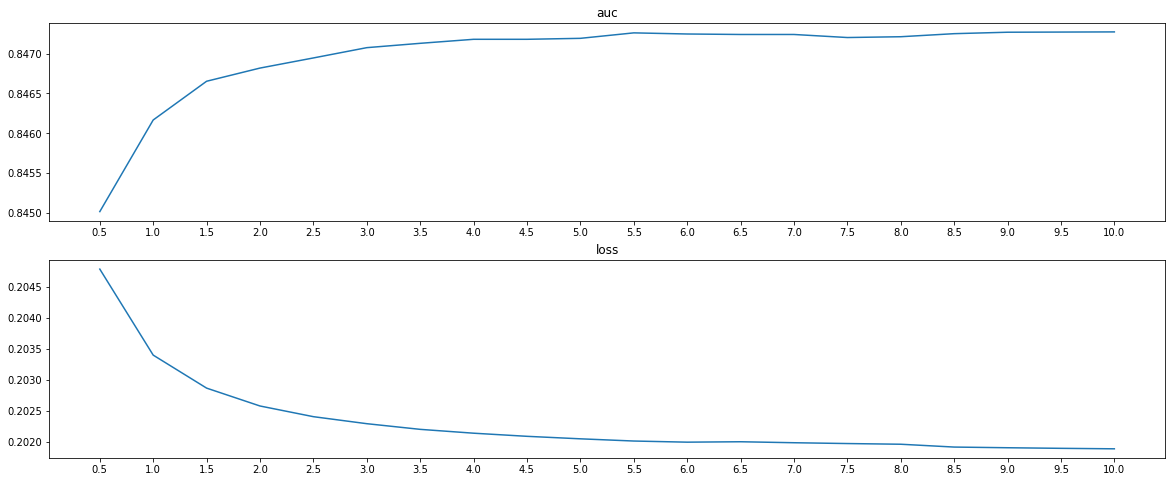

In [24]:
auc = []
loss = []
epoch = np.arange(0.5, 10.5, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

0.8472712243704763 10.0
0.20183263223550157 14.5


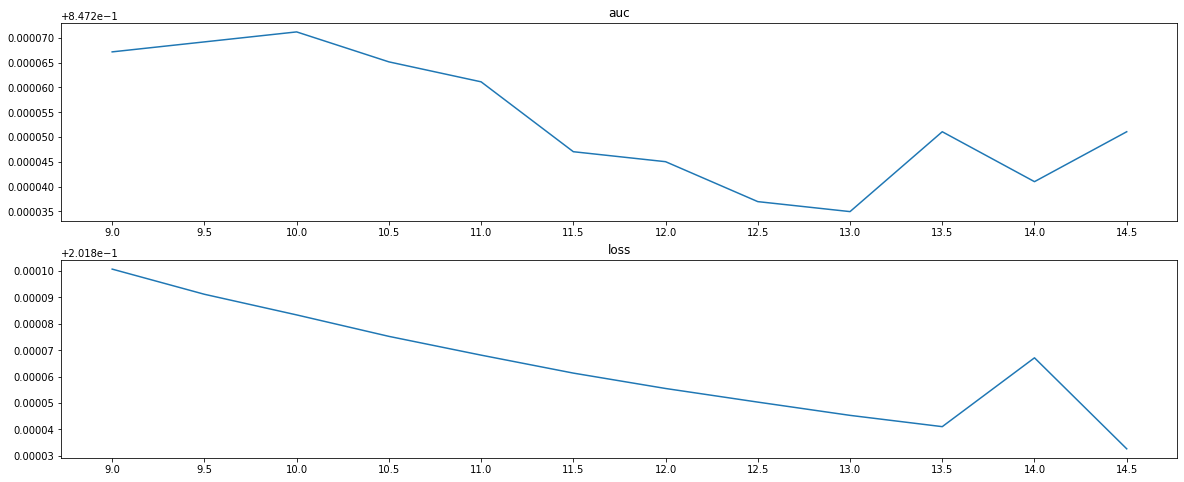

In [25]:
auc = []
loss = []
epoch = np.arange(9, 15, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8472712243704763 10
0.20188338814405835 10


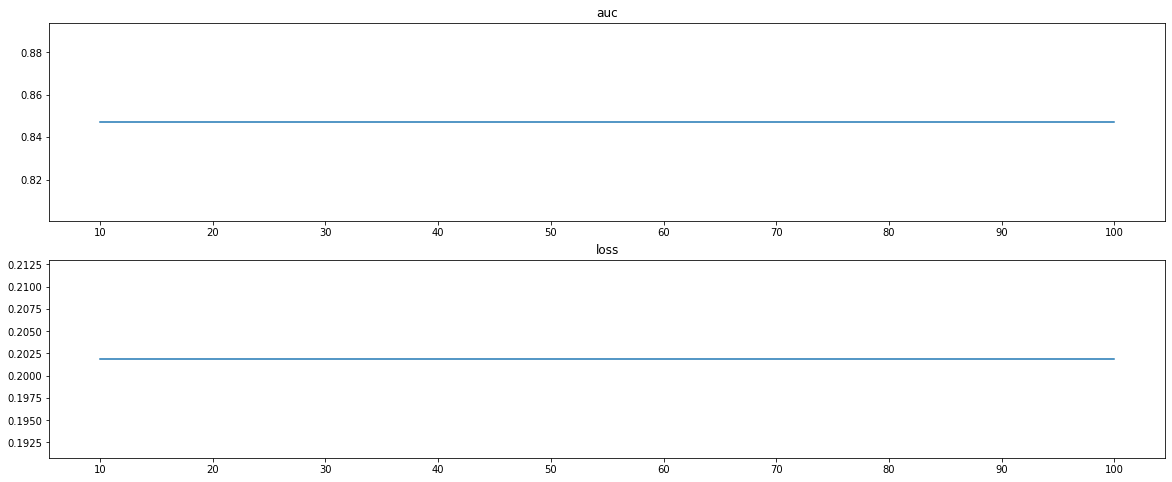

In [26]:
auc = []
loss = []
epoch = np.arange(10, 110, 10)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 10, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\sv

0.8476119433075946 8
0.20156170269951534 7


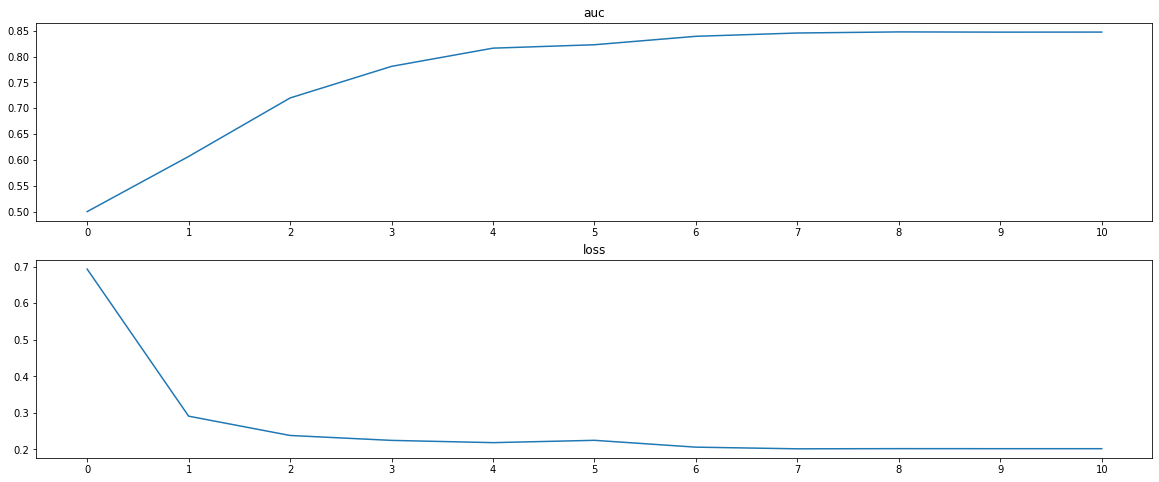

In [27]:
auc = []
loss = []
epoch = np.arange(11)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 10, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8476885546662365 l2
0.20197922940505997 l2


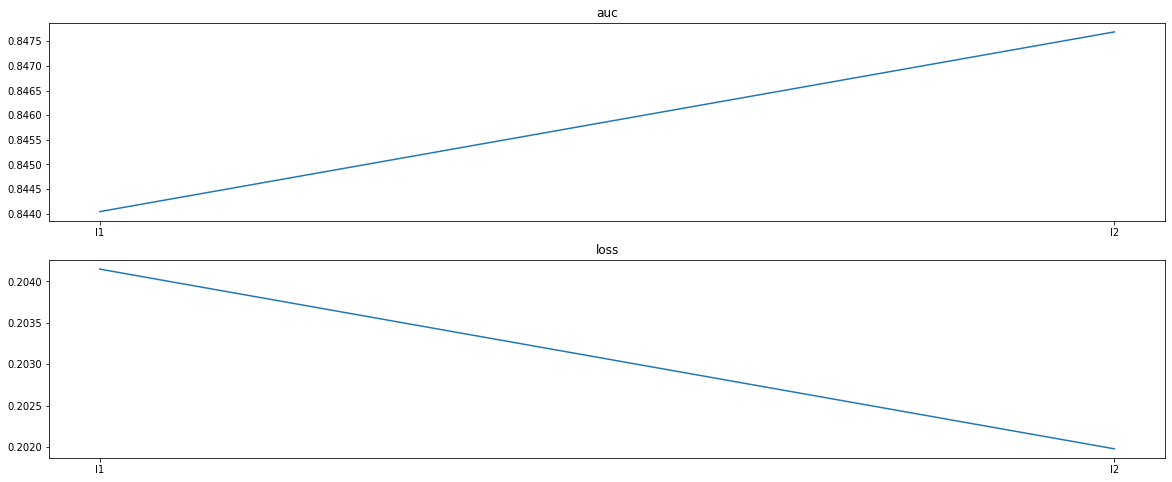

In [28]:
auc = []
loss = []
epoch = ['l1', 'l2']
for i in epoch:
    lr = LR(solver = 'liblinear',C = 5.5, max_iter = 8, penalty = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter 

0.8476119433075946 liblinear
0.2020296852261258 liblinear


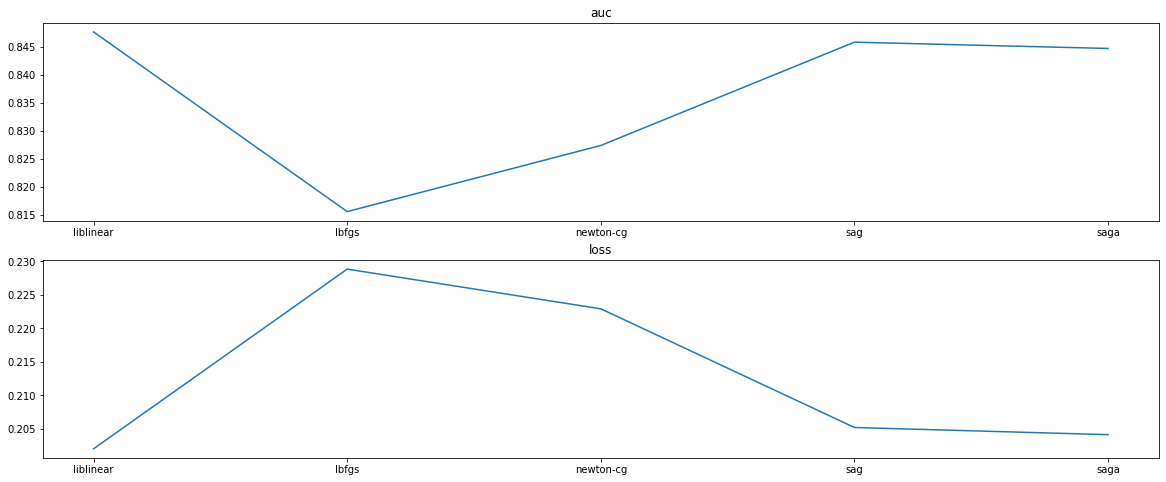

In [29]:
auc = []
loss = []
epoch = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
for i in epoch:
    lr = LR(solver = i, C = 10, max_iter = 8, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

In [30]:
data = pd.read_csv('E:/BaiduNetdiskDownload/论文/ALF_Data.csv')
data.dropna(subset = ['Hepatitis'], inplace = True)
for i in ['Weight', 'Height', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol']:
    data.loc[:, i] = SimpleImputer(strategy = 'mean').fit_transform(data[i].values.reshape(-1, 1))
for i in ['Obesity', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision', 'HyperTension', 'Family Hepatitis', 'Chronic Fatigue', 'ALF']:
    data.loc[:, i] = SimpleImputer(strategy = 'most_frequent').fit_transform(data[i].values.reshape(-1, 1))
data.loc[:, 'Body Mass Index'] = data['Weight'] / ((data['Height'] / 100) ** 2)
data.loc[:, 'Total Cholesterol'] = data['Good Cholesterol'] + data['Bad Cholesterol']
for i in ['Gender', 'Region', 'Source of Care']:
    data.loc[:, i] = OrdinalEncoder().fit_transform(data[i].values.reshape(-1, 1))
dense_features=['Age','Weight','Height',
                'Body Mass Index','Waist','Maximum Blood Pressure',
                'Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol',
                'Total Cholesterol']
mms = MinMaxScaler(feature_range=(0, 1))
data.loc[:, dense_features] = mms.fit_transform(data[dense_features])
data.loc[:, 'Hepatitis'] = data['Hepatitis'].astype('int')
train = data.iloc[:6000]
test = data.iloc[6000:]
Xtrain = train.loc[:, train.columns != 'Hepatitis']
Ytrain = train.loc[:, 'Hepatitis']
Xtest = test.loc[:, test.columns != 'Hepatitis']
Ytest = test.loc[:, 'Hepatitis']

In [31]:
lr = LR(solver = 'liblinear', random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8574343259208483
0.19121160382898467


In [32]:
lr = LR(random_state = 0).fit(Xtrain, Ytrain)
print(roc_auc_score(Ytest, lr.predict_proba(Xtest)[:, 1]))
print(log_loss(Ytest, lr.predict_proba(Xtest)[:, 1]))

0.8590492127174856
0.19075582611139516


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8590592931594121 newton-cg
0.19075582611139516 lbfgs


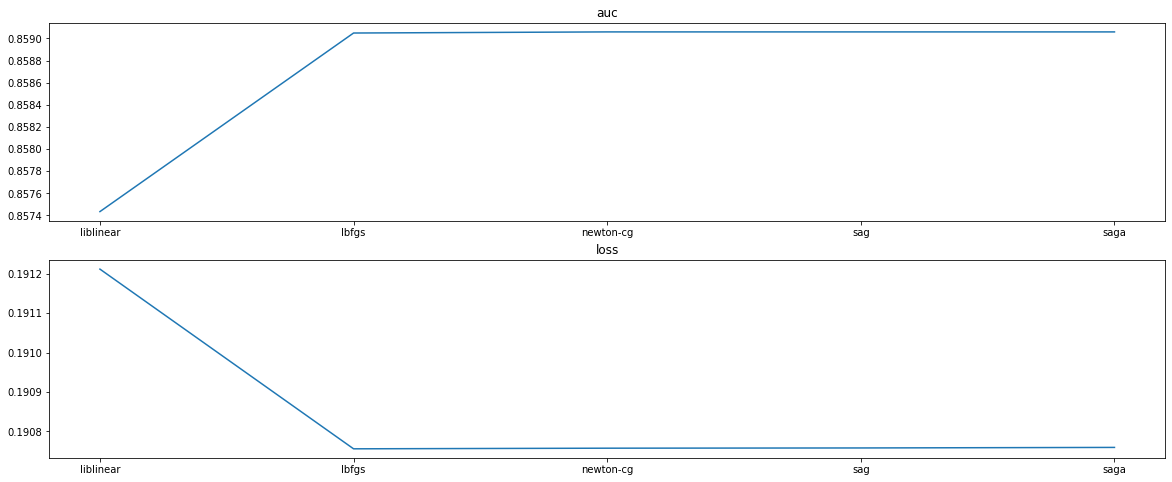

In [33]:
auc = []
loss = []
epoch = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
for i in epoch:
    lr = LR(solver = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

0.859609685288603 10.0
0.19059817934221573 10.0


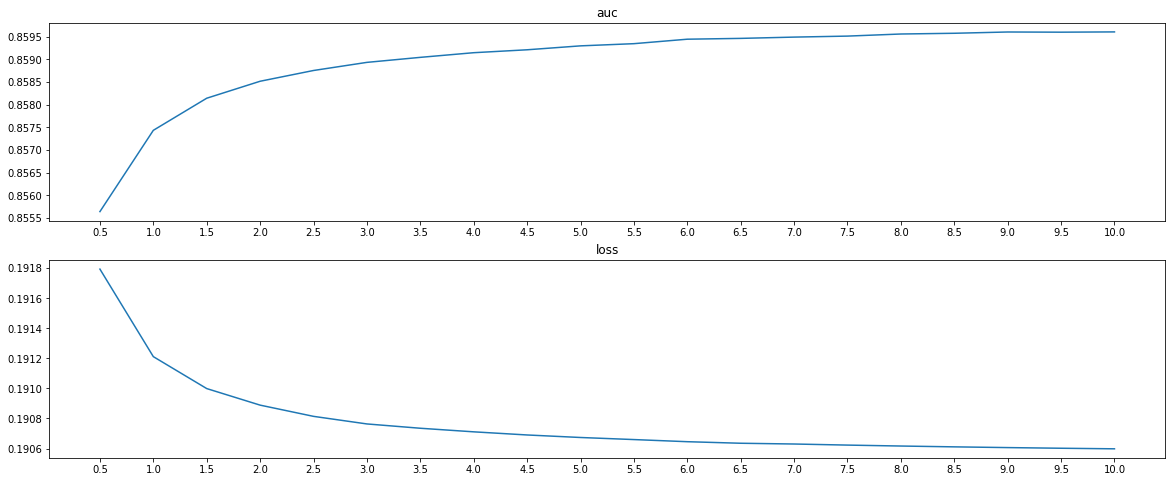

In [34]:
auc = []
loss = []
epoch = np.arange(0.5, 10.5, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

0.8596298461724562 14.5
0.19057343379935132 14.5


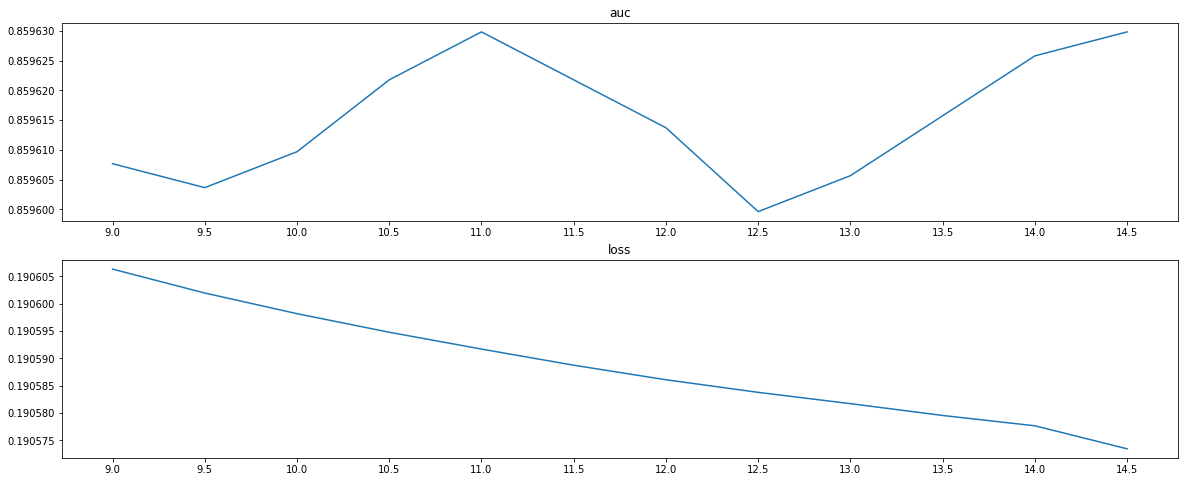

In [35]:
auc = []
loss = []
epoch = np.arange(9, 15, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

0.8596318622608414 16.0
0.19056120281339448 19.5


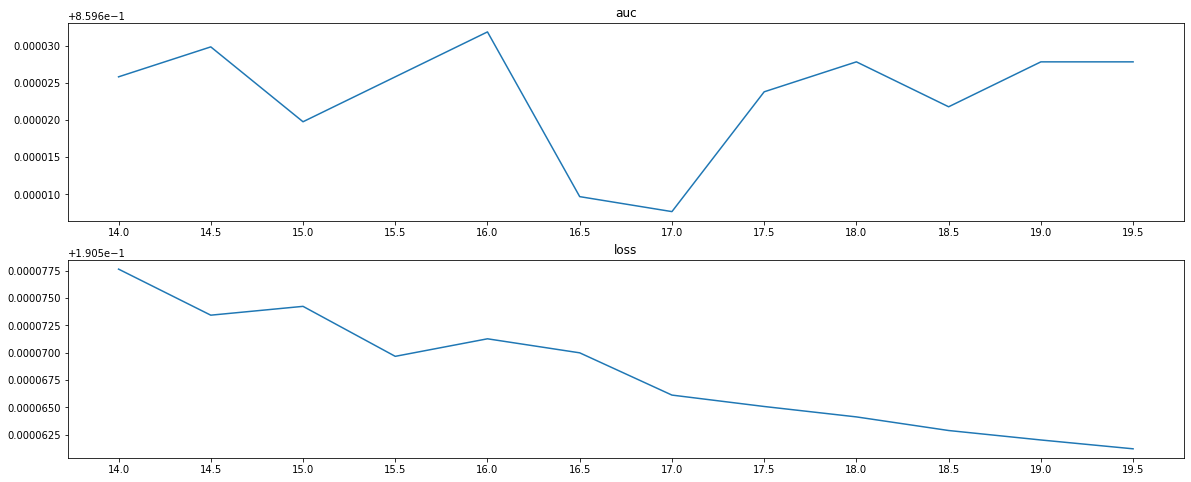

In [36]:
auc = []
loss = []
epoch = np.arange(14, 20, 0.5)
for i in epoch:
    lr = LR(solver = 'liblinear',C = i, max_iter = 100, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8596318622608414 10
0.19057127157670548 10


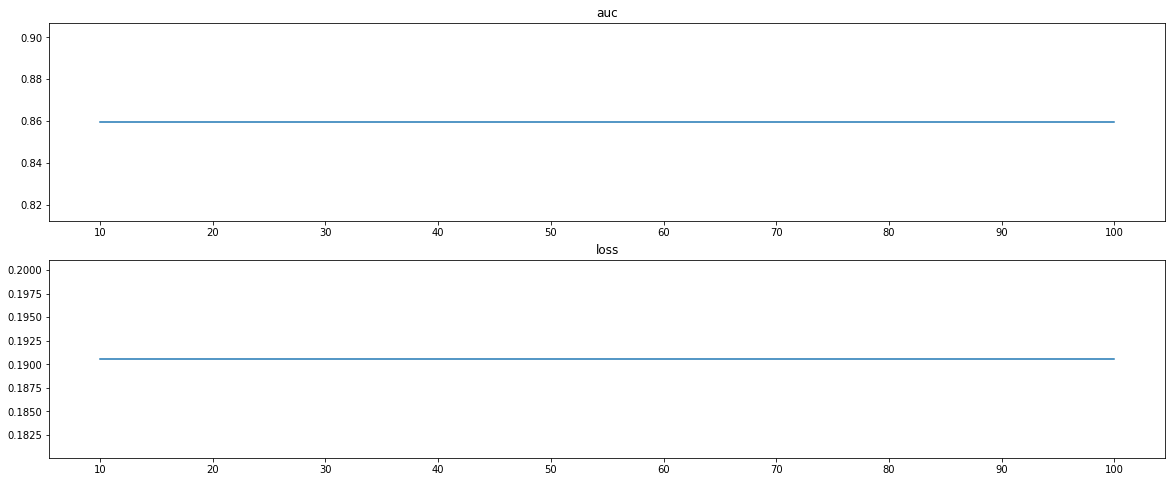

In [37]:
auc = []
loss = []
epoch = np.arange(10, 110, 10)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 16, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\sv

0.8596661357633918 8
0.19057127157670548 10


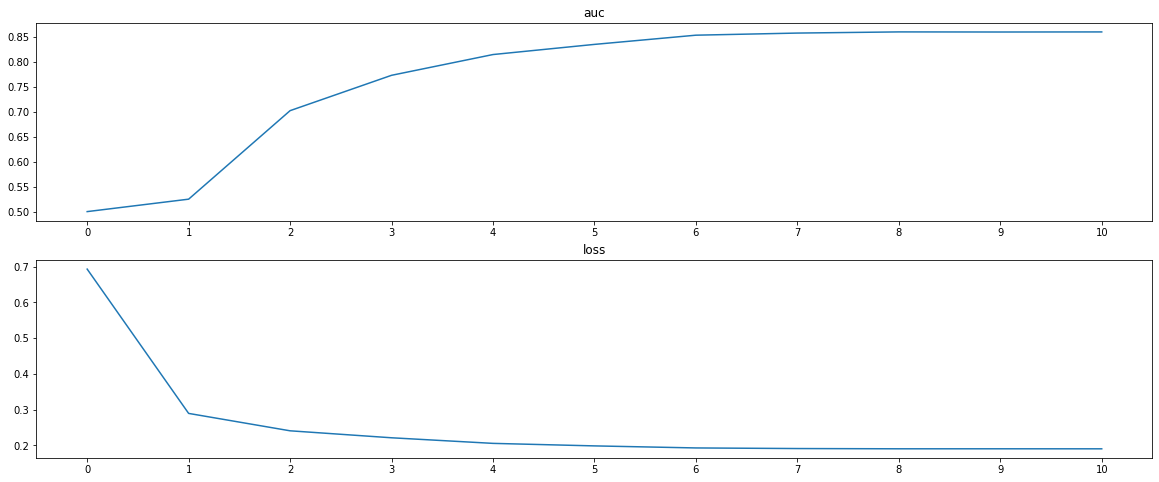

In [38]:
auc = []
loss = []
epoch = np.arange(11)
for i in epoch:
    lr = LR(solver = 'liblinear',C = 16, max_iter = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()

E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8596661357633918 l2
0.19062335358771454 l2


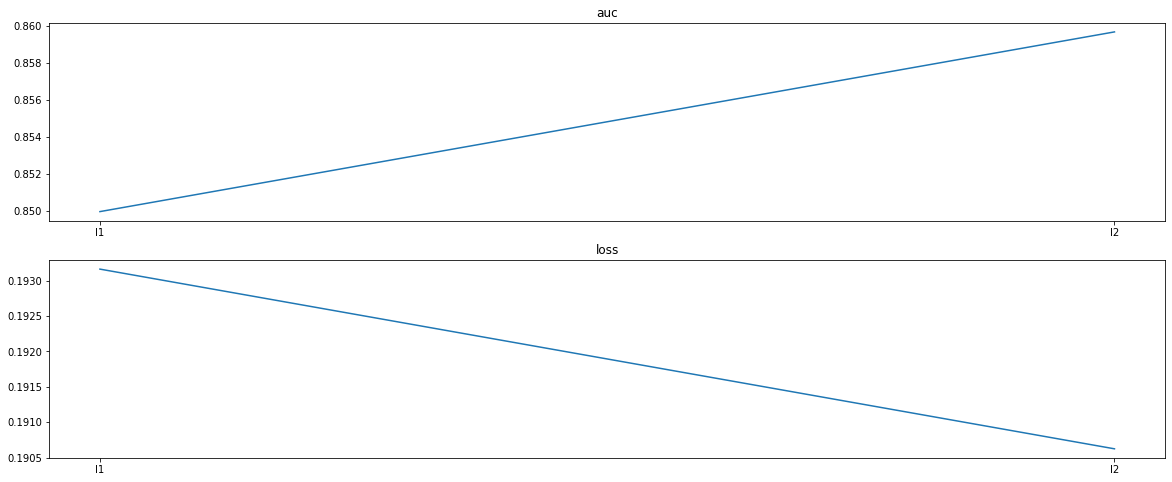

In [39]:
auc = []
loss = []
epoch = ['l1', 'l2']
for i in epoch:
    lr = LR(solver = 'liblinear',C = 16, max_iter = 8, penalty = i, random_state = 0).fit(Xtrain, Ytrain)
    Ypredict = lr.predict_proba(Xtest)[:, 1]
    auc.append(roc_auc_score(Ytest, Ypredict))
    loss.append(log_loss(Ytest, Ypredict))            
print(max(auc), epoch[auc.index(max(auc))])
print(min(loss), epoch[loss.index(min(loss))]) 
figure, ax = plt.subplots(2,figsize = (20, 8))
ax[0].plot(epoch, auc)
ax[0].set_xticks(epoch)
ax[0].set_title('auc')
ax[1].plot(epoch, loss)
ax[1].set_xticks(epoch)
ax[1].set_title('loss')
plt.show()